## Observations and Insights 

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [123]:
# Checking the number of mice.
mice_count = len(combined_data['Mouse ID'])
mice_count

1893

In [124]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [125]:
# Optional: Get all the data for the duplicate mouse ID. 


In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe_dup_dropped = combined_data.drop_duplicates(keep=False,inplace=False)
clean_dataframe_dup_dropped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [127]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_dataframe_dup_dropped['Mouse ID'])
clean_mice_count

1891

## Summary Statistics

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_summary_tumor_vol = clean_dataframe_dup_dropped.sort_values(['Tumor Volume (mm3)'])
regimen_summary = stat_summary_tumor_vol.groupby(['Drug Regimen'])


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_drug_regimen = regimen_summary['Tumor Volume (mm3)'].mean()
median_drug_regimen = regimen_summary['Tumor Volume (mm3)'].median()
drug_regimen_variance = regimen_summary['Tumor Volume (mm3)'].var()
std_drug_regimen = regimen_summary['Tumor Volume (mm3)'].std()
drug_regimen_SEM = regimen_summary['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Mean": mean_drug_regimen, "Median": median_drug_regimen, "Variance": drug_regimen_variance, "Standard Deviation": std_drug_regimen, "SEM": drug_regimen_SEM})


# Assemble the resulting series into a single summary dataframe.
summary_stats["Mean"] = summary_stats["Mean"].astype(float).map("{:2f}".format)
summary_stats["Median"] = summary_stats["Mean"].astype(float).map("{:.2f}".format)
summary_stats["Variance"] = summary_stats["Variance"].astype(float).map("{:,.2f}".format)
summary_stats["Standard Deviation"] = summary_stats["Variance"].astype(float).map("{:,.2f}".format)
summary_stats["SEM"] = summary_stats["Variance"].astype(float).map("{:,.2f}".format)

print (summary_stats)

                   Mean Median Variance Standard Deviation    SEM
Drug Regimen                                                     
Capomulin     40.675741  40.68    24.95              24.95  24.95
Ceftamin      52.591172  52.59    39.29              39.29  39.29
Infubinol     52.884795  52.88    43.13              43.13  43.13
Ketapril      55.235638  55.24    68.55              68.55  68.55
Naftisol      54.331565  54.33    66.17              66.17  66.17
Placebo       54.033581  54.03    61.17              61.17  61.17
Propriva      52.414660  52.41    42.20              42.20  42.20
Ramicane      40.216745  40.22    23.49              23.49  23.49
Stelasyn      54.233149  54.23    59.45              59.45  59.45
Zoniferol     53.236507  53.24    48.53              48.53  48.53


In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_summary_tumor_vol = clean_dataframe_dup_dropped.sort_values(['Tumor Volume (mm3)'])
regimen_summary = stat_summary_tumor_vol.groupby(['Drug Regimen'])

# Using the aggregation method, produce the same summary statistics in a single line
clean_dataframe_dup_dropped.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000
mean,12.805923,25.662084,19.592808,50.454143,1.022739
std,7.188460,3.923681,14.072497,8.897660,1.138090
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.957919,1.000000
75%,20.000000,29.000000,30.000000,56.305633,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar and Pie Charts

In [130]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen = combined_data.groupby('Drug Regimen')
regimen_summary = pd.DataFrame(drug_regimen["Drug Regimen"].count())


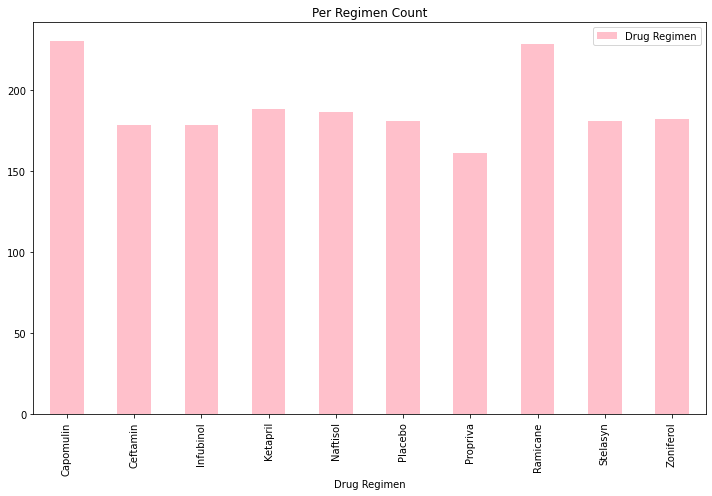

In [131]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_summary.plot(kind="bar", figsize=(10,7), title="Drug Regimen Measurements", color="pink")
plt.title("Per Regimen Count")
plt.show
plt.tight_layout()


In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_dataframe_dup_dropped.groupby('Sex')
mice_gender_count = pd.DataFrame(mice_gender['Sex'].count())
mice_gender_count.head

<bound method NDFrame.head of         Sex
Sex        
Female  933
Male    958>

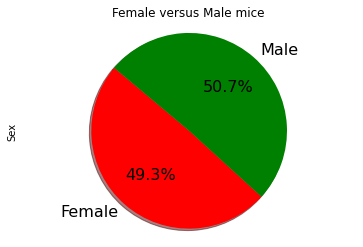

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_count.plot(kind='pie', y='Sex', \
                        title="Female versus Male mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["red","green"],legend =False)
# Make the axis equal to avoid plotting an egg shaped pie chart
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
four_tumor_vols = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

four_tumor_data = clean_dataframe_dup_dropped[clean_dataframe_dup_dropped['Drug Regimen'].isin(four_tumor_vols)]

four_tumor_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


SyntaxError: unexpected EOF while parsing (<ipython-input-141-7c1a1dfce32d>, line 1)

In [144]:
# Put treatmenfour_tumor_datats into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
counter = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in four_tumor_data:
    quartiles = four_tumor_data[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

TypeError: 'method' object is not subscriptable

In [ ]:
for drug in four_drug_list:
    boxplot_list.append(list(four_tumor_data[drug].dropna()))

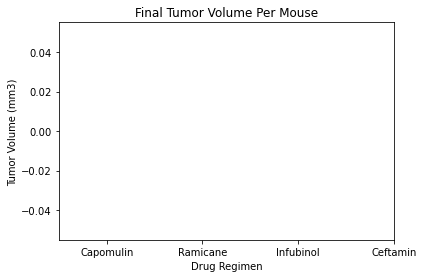

In [97]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_volume = four_tumor_combined_data['Tumor Volume (mm3)']
list = []
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Per Mouse')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(list, notch=0, sym='gD')

plt.xticks([1,2,3,4],four_tumor_vols)
plt.show()

## Line and Scatter Plots

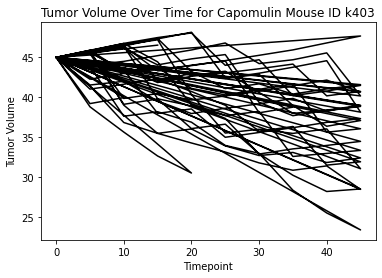

In [112]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_drug = clean_dataframe_dup_dropped.loc[(clean_dataframe_dup_dropped["Drug Regimen"] == "Capomulin"),:]
a_mouse = clean_dataframe_dup_dropped.loc[(clean_dataframe_dup_dropped["Mouse ID"] == "k403"),:]
timepoint = capomulin_drug["Timepoint"]
volume = capomulin_drug["Tumor Volume (mm3)"]

line_plot = plt.plot(timepoint, volume, color ="black")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume Over Time for Capomulin Mouse ID k403')
plt.show()

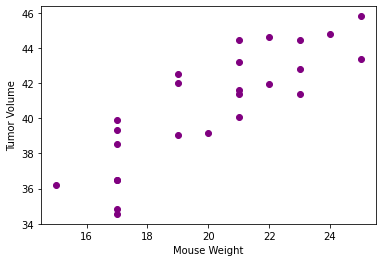

In [117]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = capomulin_drug.groupby(capomulin_drug["Mouse ID"])["Weight (g)"].mean()
volume = capomulin_drug.groupby(capomulin_drug["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weight,volume, color="purple")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

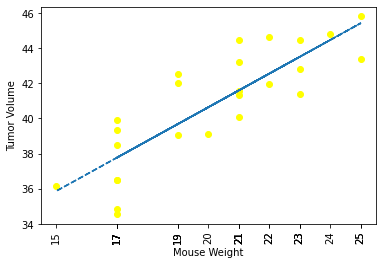

The correlation between weight and tumor value is 0.84


In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_drug.groupby(capomulin_drug["Mouse ID"])["Weight (g)"].mean()
volume = capomulin_drug.groupby(capomulin_drug["Mouse ID"])["Tumor Volume (mm3)"].mean()

slope, int, r, p, std_err = st.linregress(weight, volume)

fit = slope * weight + int


plt.scatter(weight,volume, color="yellow")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')